# Tutorial 

 ## Uncertainty-aware INVASE
 ## How confident is our instance-wise feature selector?

This tutorial shows how to use the uncertainty-aware INVASE. We are using the well known UCI dataset "breast-cancer-wisconsin.csv" as an example.

Load dataset and show the first five samples:

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
data = load_breast_cancer()  # get Breast Cancer Dataset

df = pd.DataFrame(data.data, columns=data.feature_names) # create pandas dataframe
target = 'target'
df[target] = data.target
fn_csv = 'data+.csv'
df.to_csv(fn_csv, index=False)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Run invase

In [7]:
fn_feature_score = "feature_score.csv.gz"
num_epoch = 2000
!python3 invase+.py -i {fn_csv} --target {target} --it {num_epoch} -o {fn_feature_score}

Using TensorFlow backend.
/home/lnn/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/lnn/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/lnn/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/lnn/.local/lib/python3.5/site-packages/tensorflow/python/framework/d

Epoch:      0, d_loss (Acc)): 0.112, v_loss (Acc): 0.255, g_loss: -1.6248
Epoch:    100, d_loss (Acc)): 0.934, v_loss (Acc): 0.960, g_loss: +0.2532
Epoch:    200, d_loss (Acc)): 0.947, v_loss (Acc): 0.974, g_loss: +0.2494
Epoch:    300, d_loss (Acc)): 0.956, v_loss (Acc): 0.985, g_loss: +0.3363
Epoch:    400, d_loss (Acc)): 0.934, v_loss (Acc): 0.980, g_loss: +0.3045
Epoch:    500, d_loss (Acc)): 0.956, v_loss (Acc): 0.976, g_loss: +0.4887
Epoch:    600, d_loss (Acc)): 0.934, v_loss (Acc): 0.982, g_loss: +0.4035
Epoch:    700, d_loss (Acc)): 0.965, v_loss (Acc): 0.985, g_loss: +0.3437
Epoch:    800, d_loss (Acc)): 0.941, v_loss (Acc): 0.993, g_loss: +0.3672
Epoch:    900, d_loss (Acc)): 0.932, v_loss (Acc): 0.978, g_loss: +0.4847
Epoch:   1000, d_loss (Acc)): 0.952, v_loss (Acc): 0.982, g_loss: +0.2824
Epoch:   1100, d_loss (Acc)): 0.945, v_loss (Acc): 0.982, g_loss: +0.4290
Epoch:   1200, d_loss (Acc)): 0.923, v_loss (Acc): 0.982, g_loss: +0.1294
Epoch:   1300, d_loss (Acc)): 0.908, v

y: train:{0.0, 1.0} test:{0.0, 1.0}
(455, 30) (455, 2) (114, 30) (114, 2)
x_test:(114, 30)
selprob 3) [3.4712507e-06 1.2275435e-04 9.9999815e-01 4.7494166e-05 1.9841311e-06
 1.8220828e-05 1.0000000e+00 6.6472637e-04 9.9985999e-01 9.9999982e-01
 9.9997538e-01 5.9048655e-09 6.2811496e-12 1.5191101e-04 6.2760439e-05
 1.4457245e-12 7.4135078e-06 2.5867630e-05 2.2717108e-04 5.3269011e-10
 4.9758504e-09 9.9998099e-01 1.3221912e-11 9.9999994e-01 1.5365792e-04
 2.1667961e-06 9.9991632e-01 9.9963957e-01 9.9697775e-01 4.5014909e-05]
score   3) [0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 1. 1. 1. 0.]
loading csv data+.csv
features: #30 ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points err

y: train:{0.0, 1.0} test:{0.0, 1.0}
(455, 30) (455, 2) (114, 30) (114, 2)
x_test:(114, 30)
selprob 8) [3.0683980e-06 1.1175959e-04 9.9999815e-01 4.0238370e-05 2.0863868e-06
 1.5945603e-05 1.0000000e+00 6.8548939e-04 9.9986631e-01 9.9999988e-01
 9.9998021e-01 4.3999808e-09 6.2594565e-12 1.6257603e-04 5.3857591e-05
 1.4108337e-12 6.2644617e-06 2.0793705e-05 2.9302505e-04 4.8806303e-10
 2.9217226e-08 9.9998474e-01 1.3124723e-11 9.9999994e-01 1.3740493e-04
 1.8502280e-06 9.9992621e-01 9.9962652e-01 9.9697226e-01 4.0785373e-05]
score   8) [0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 1. 1. 1. 0.]
loading csv data+.csv
features: #30 ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points err

loading csv data+.csv
features: #30 ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension'] label:target
features: #30 ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fracta

y: train:{0.0, 1.0} test:{0.0, 1.0}
(455, 30) (455, 2) (114, 30) (114, 2)
x_test:(114, 30)
selprob 18) [1.7719289e-06 9.1646354e-05 9.9999893e-01 1.5087373e-05 8.9401664e-07
 2.9079943e-06 1.0000000e+00 3.9967813e-04 9.9990827e-01 9.9999994e-01
 9.9166965e-01 3.6611214e-09 1.1979094e-14 1.1568535e-04 1.5531645e-05
 2.0815322e-12 2.8214533e-06 1.1498779e-05 1.8767468e-04 6.0629300e-11
 1.6495438e-08 9.9999499e-01 4.0312569e-13 1.0000000e+00 8.0835627e-05
 6.2199268e-07 9.9997973e-01 9.9977446e-01 9.9874115e-01 2.3951607e-05]
score   18) [0.         0.         1.         0.         0.         0.
 1.         0.         1.         1.         0.99122807 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         1.         0.         1.
 0.         0.         1.         1.         1.         0.        ]
loading csv data+.csv
features: #30 ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity'

Compare overall performance

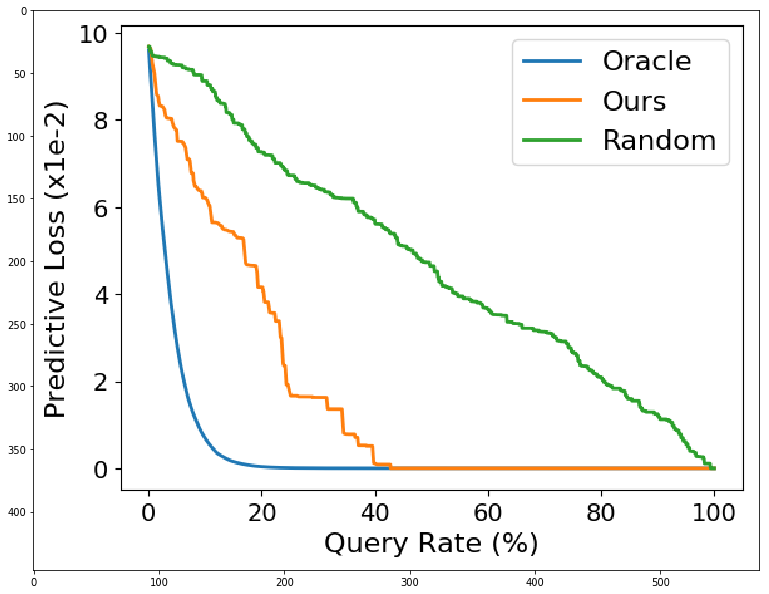

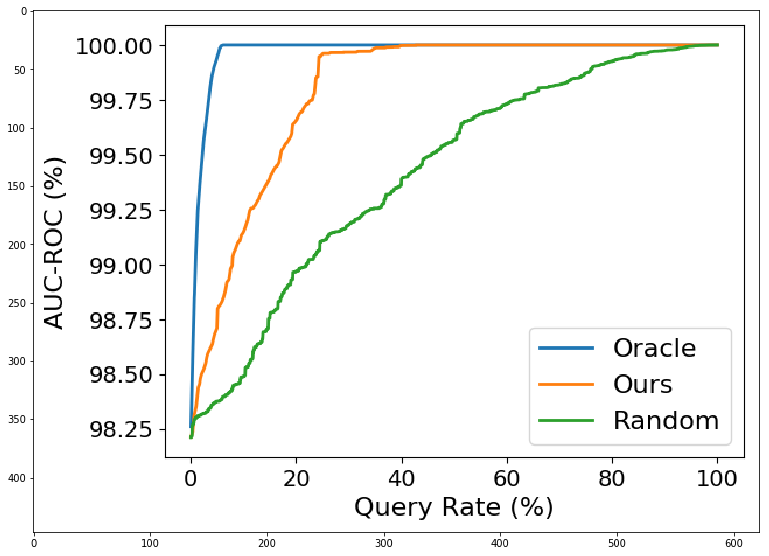

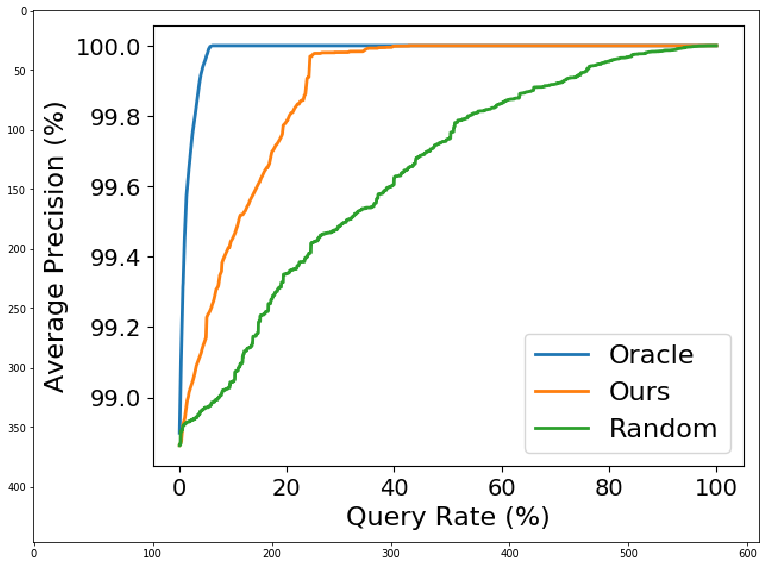

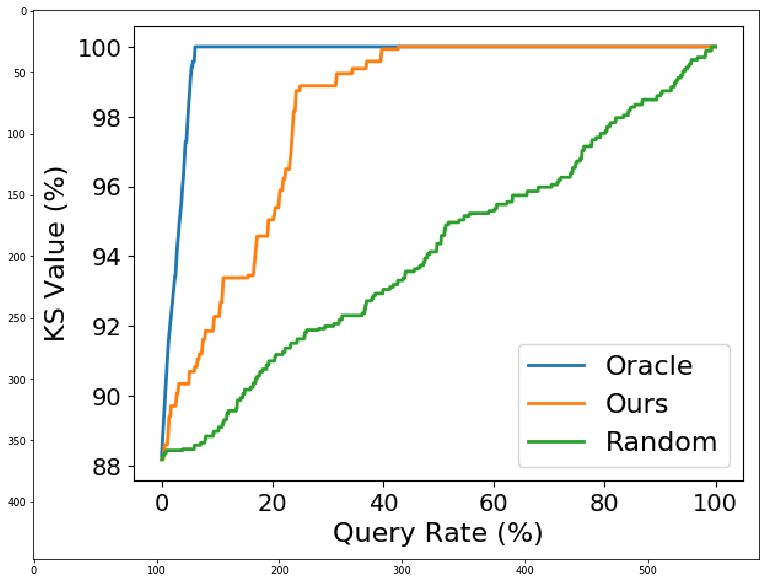

In [8]:
!python3 invase+_ana.py --metric loss
!python3 invase+_ana.py --metric auc
!python3 invase+_ana.py --metric ap
!python3 invase+_ana.py --metric ks
import matplotlib.pyplot as plt;import matplotlib.image as mpimg;img=mpimg.imread('loss.png'); plt.imshow(img);plt.show()
import matplotlib.pyplot as plt;import matplotlib.image as mpimg;img=mpimg.imread('auc.png'); plt.imshow(img);plt.show()
import matplotlib.pyplot as plt;import matplotlib.image as mpimg;img=mpimg.imread('ap.png'); plt.imshow(img);plt.show()
import matplotlib.pyplot as plt;import matplotlib.image as mpimg;img=mpimg.imread('ks.png'); plt.imshow(img);plt.show()

Explore Uncertainty

Using TensorFlow backend.
/home/lnn/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/lnn/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/lnn/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/lnn/.local/lib/python3.5/site-packages/tensorflow/python/framework/d

2020-01-31 02:40:33.874576: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
Epoch:      0, d_loss (Acc)): 0.165, v_loss (Acc): 0.143, g_loss: +0.3084
Epoch:    100, d_loss (Acc)): 0.857, v_loss (Acc): 0.901, g_loss: +0.0569
Epoch:    200, d_loss (Acc)): 0.857, v_loss (Acc): 0.859, g_loss: +0.1457
Epoch:    300, d_loss (Acc)): 0.877, v_loss (Acc): 0.895, g_loss: +0.1237
Epoch:    400, d_loss (Acc)): 0.820, v_loss (Acc): 0.835, g_loss: +0.1511
no ground truth relevance
loading csv data+.csv
features: #30 ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius

loading csv data+.csv
features: #30 ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension'] label:target
features: #30 ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fracta

loading csv data+.csv
features: #30 ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension'] label:target
features: #30 ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fracta

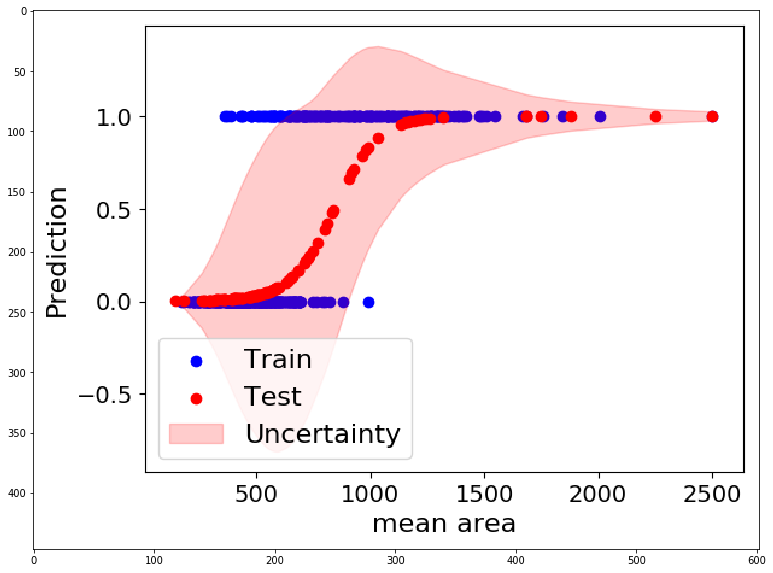

In [9]:
feature_dim = 3
iters = 500
!python3 explore_uncertainty.py -i {fn_csv} --target {target} --it {iters} -o {fn_feature_score} --feat {feature_dim}
import matplotlib.pyplot as plt;import matplotlib.image as mpimg;img=mpimg.imread('%d.png' % feature_dim); plt.imshow(img);plt.show()

Analyse results and generate plots

0 fractal dimension error        mean:0.004 std:0.003
1 smoothness error               mean:0.007 std:0.003
2 concave points error           mean:0.012 std:0.006
3 symmetry error                 mean:0.021 std:0.008
4 compactness error              mean:0.025 std:0.018
5 concavity error                mean:0.032 std:0.030
6 mean concave points            mean:0.049 std:0.039
7 mean fractal dimension         mean:0.063 std:0.007
8 worst fractal dimension        mean:0.084 std:0.018
9 mean concavity                 mean:0.089 std:0.080
10 mean smoothness                mean:0.096 std:0.014
11 mean compactness               mean:0.104 std:0.053
12 worst concave points           mean:0.115 std:0.066
13 worst smoothness               mean:0.132 std:0.023
14 mean symmetry                  mean:0.181 std:0.027
15 worst compactness              mean:0.254 std:0.157
16 worst concavity                mean:0.272 std:0.208
17 worst symmetry                 mean:0.290 std:0.062
18 radius error     

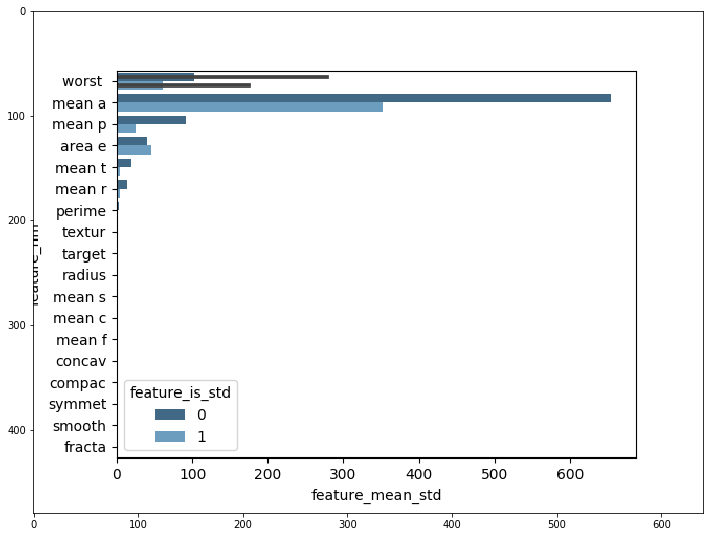

In [10]:
fn_json = 'result+.json'
!python3 invase_ana.py -i {fn_csv} -o {fn_json}
!python3 invase_plot.py  -i {fn_csv} -oglobal global.png -osample sample.png -isstd 1
import matplotlib.pyplot as plt; plt.rcParams['figure.figsize'] = [12, 12];import matplotlib.image as mpimg;img=mpimg.imread('global.png'); plt.imshow(img);plt.show()

Show plot features importance per sample

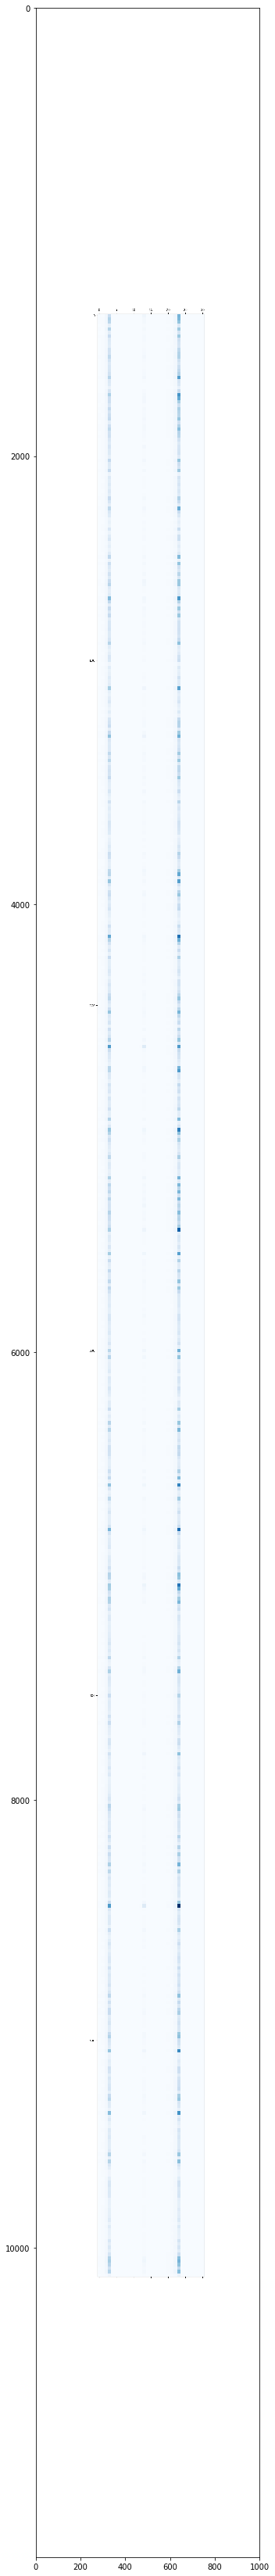

In [11]:
import matplotlib.pyplot as plt; plt.rcParams['figure.figsize'] = [13, 60];import matplotlib.image as mpimg;img=mpimg.imread('sample.png'); plt.imshow(img);plt.show()


